In [1]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
import time
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('TSP_QTR194.csv')
data

,column1,column2
0,24748.3333,50840.0000
1,24758.8889,51211.9444
2,24827.2222,51394.7222
3,24904.4444,51175.0000
4,24996.1111,51548.8889
...,...,...
189,26123.6111,51169.1667
190,26123.6111,51222.7778
191,26133.3333,51216.6667
192,26133.3333,51300.0000


In [4]:
coord_list=data[['column1','column2']].values.tolist()
coord_list

[[24748.3333, 50840.0],
 [24758.8889, 51211.9444],
 [24827.2222, 51394.7222],
 [24904.4444, 51175.0],
 [24996.1111, 51548.8889],
 [25010.0, 51039.4444],
 [25030.8333, 51275.2778],
 [25067.7778, 51077.5],
 [25100.0, 51516.6667],
 [25103.3333, 51521.6667],
 [25121.9444, 51218.3333],
 [25150.8333, 51537.7778],
 [25158.3333, 51163.6111],
 [25162.2222, 51220.8333],
 [25167.7778, 51606.9444],
 [25168.8889, 51086.3889],
 [25173.8889, 51269.4444],
 [25210.8333, 51394.1667],
 [25211.3889, 51619.1667],
 [25214.1667, 50807.2222],
 [25214.4444, 51378.8889],
 [25223.3333, 51451.6667],
 [25224.1667, 51174.4444],
 [25233.3333, 51333.3333],
 [25234.1667, 51203.0556],
 [25235.5556, 51330.0],
 [25235.5556, 51495.5556],
 [25242.7778, 51428.8889],
 [25243.0556, 51452.5],
 [25252.5, 51559.1667],
 [25253.8889, 51535.2778],
 [25253.8889, 51549.7222],
 [25256.9444, 51398.8889],
 [25263.6111, 51516.3889],
 [25265.8333, 51545.2778],
 [25266.6667, 50969.1667],
 [25266.6667, 51483.3333],
 [25270.5556, 51532.7778]

In [6]:
fitness_coords = mlrose.TravellingSales(coords=coord_list)

In [7]:
problem_fit = mlrose.TSPOpt(length = 194, fitness_fn = fitness_coords, maximize=False)

In [8]:
t1 = time.time()

In [9]:
best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem=problem_fit,
                                                             pop_size=100,
                                                             mutation_prob=0.1,
                                                             max_attempts=10,
                                                             max_iters=100,
                                                             curve=True)

In [10]:
t2 = time.time()
comp_time = t2 - t1

In [11]:
comp_time

3.9745912551879883

In [12]:
soln = pd.DataFrame(best_state, columns=[''])
soln.to_csv("QTR194_sol.csv", sep=",")

In [13]:
print(best_state)
print(best_fitness)
print(fitness_curve)

[113  62  24  44  84  97  21   0 114 145 159 128 141  35  74  56 120 166
  70 109  32   1  23  16 162   9 176  90  65 147 174 185  61 100  98 105
  25  53  94  34   5 137 115  78   8  67  11 140 102  13 150 191 165 110
  27  68 130 132 138 158 136 142 135 119  41  91 192 181  26 182 168 186
  38 117 123  75 180  31  47 144 187 175  46  81  87 170   4 164  17   3
  36 143 101  63  72  50  95  73 154 190 107  42 118  29 133 148 173  71
  51 139 156 161 151  40 178 152  20  14  15  18  88 146 157  19  22  86
 111  96 163 131 149 106  77 125  76  58  92 155 177 193  82 126  28   6
   2  55  57  30  93  49 153 116  39 112 103  99 169 188 129 124  52 179
 184 108   7  43  37  59  89  79 160 134  54  83  66  33  64 171  69  80
  45  85 172 104 189 122 183 167 127 121  60  10  12  48]
81908.40129105259
[-82774.95481104 -82774.95481104 -81908.40129105 -81908.40129105
 -81908.40129105 -81908.40129105 -81908.40129105 -81908.40129105
 -81908.40129105 -81908.40129105 -81908.40129105 -81908.40129105

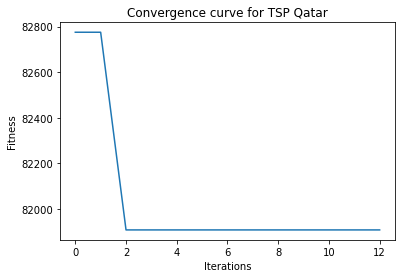

In [15]:
plt.plot(-(fitness_curve))
plt.title("Convergence curve for TSP Qatar")
plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.show()